In [3]:
#import seaborn as sns
import matplotlib.pyplot as pl
import glob
import pandas as pd
from datetime import datetime
path = "/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/*FIFO.csv"
all_file = glob.glob(path)

In [2]:
### file baseline simulation
all_file.sort(reverse = False)
all_file

['/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/simulated_log_LSTM_BPI_Challenge_2012_W_Two_TS_0_FIFO.csv',
 '/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/simulated_log_LSTM_BPI_Challenge_2012_W_Two_TS_1_FIFO.csv']

In [3]:
CT_baseline = []
for file in all_file:
    df = pd.read_csv(file, sep=',')
    LEN = 182
    for i in range(1, 1201):
        caseid = df.loc[df['caseid'] == i]
        start = datetime.strptime(min(caseid['enabled:time']), '%Y-%m-%d %H:%M:%S')
        end = datetime.strptime(max(caseid['time:timestamp']), '%Y-%m-%d %H:%M:%S')
        CT_baseline.append((end-start).total_seconds())

In [4]:
len(CT_baseline)

2400

In [5]:
#### PPO
path = "/Users/francescameneghello/Documents/GitHub/rl-rims/output/output_BPI_Challenge_2012_W_Two_TS/*.csv"
all_file = glob.glob(path)
DRL = []
#DRL_case = []
for file in all_file:
    df = pd.read_csv(file, sep=',')
    LEN = 182
    for i in range(0,1200):
        #if i in df['id_case']:
        caseid = df.loc[df['id_case'] == i]
        start = datetime.strptime(min(caseid['start_time']), '%Y-%m-%d %H:%M:%S')
        end = datetime.strptime(max(caseid['end_time']), '%Y-%m-%d %H:%M:%S')
        DRL.append((end-start).total_seconds())

In [7]:
path = "/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/*SPT.csv"
all_file = glob.glob(path)
SPT = []
#DRL_case = []
for file in all_file:
    df = pd.read_csv(file, sep=',')
    LEN = 182
    for i in range(1, 501):
        caseid = df.loc[df['caseid'] == i]
        start = datetime.strptime(min(caseid['start:timestamp']), '%Y-%m-%d %H:%M:%S')
        end = datetime.strptime(max(caseid['time:timestamp']), '%Y-%m-%d %H:%M:%S')
        SPT.append((end-start).total_seconds())

In [31]:
len(SPT)

1000

/Users/francescameneghello/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

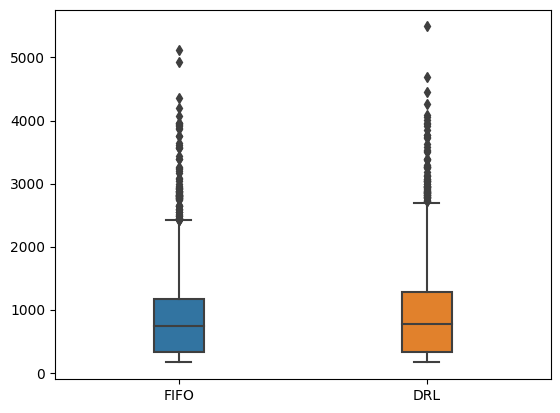

In [6]:
#df = pd.Series(time_FIFO, name="FIFO").to_frame().join(pd.Series(time_FIFO, name="SPT")).join(pd.Series(time, name="DRL"))
df = pd.Series(CT_baseline, name="FIFO").to_frame().join(pd.Series(DRL, name="DRL"))
sns.boxplot(data=df, width = 0.2) 

/Users/francescameneghello/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

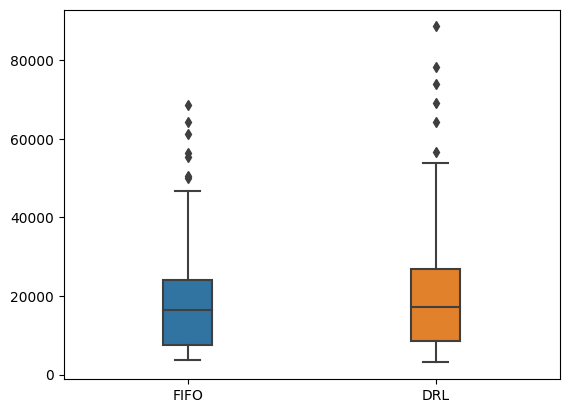

In [15]:
df = pd.Series(CT_baseline, name="FIFO").to_frame().join(pd.Series(DRL, name="DRL"))
sns.boxplot(data=df, width = 0.2) 

In [142]:
FIFO_processing_time = []
df = pd.read_csv("/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/confidential_1000/results/simulated_log_LSTM_confidential_1000_0_FIFO.csv", sep=',')
LEN = len(set(df['caseid']))
for i in range(1, LEN):
    caseid = df.loc[df['caseid'] == i]
    for i in range(1, len(caseid)):
        start = datetime.strptime(caseid.iloc[i]['start:timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        end = datetime.strptime(caseid.iloc[i]['time:timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        FIFO_processing_time.append((end-start).total_seconds())
#FIFO_processing_time

In [164]:
SPT_processing_time = []
df = pd.read_csv("/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/confidential_1000/results/simulated_log_LSTM_confidential_1000_0_SPT.csv", sep=',')
LEN = len(set(df['caseid']))
for i in range(1, LEN):
    caseid = df.loc[df['caseid'] == i]
    for i in range(0, len(caseid)):
        start = datetime.strptime(caseid.iloc[i]['start:timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        end = datetime.strptime(caseid.iloc[i]['time:timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        SPT_processing_time.append((end-start).total_seconds())

In [167]:
DRL_processing_time = []
df = pd.read_csv("/Users/francescameneghello/Documents/GitHub/rl-rims/output/output_output_confidential_1000/simulated_log_output_confidential_1000_None.csv", sep=',')
LEN = len(set(df['id_case']))
for i in range(1, LEN):
    caseid = df.loc[df['id_case'] == i]
    for i in range(0, len(caseid)):
        start = datetime.strptime(caseid.iloc[i]['start_time'], '%Y-%m-%d %H:%M:%S.%f')
        end = datetime.strptime(caseid.iloc[i]['end_time'], '%Y-%m-%d %H:%M:%S.%f')
        DRL_processing_time.append((end-start).total_seconds())

/Users/francescameneghello/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

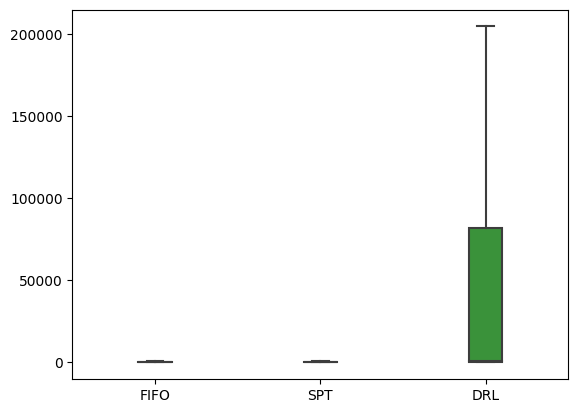

In [168]:
df = pd.Series(SPT_processing_time, name="FIFO").to_frame().join(pd.Series(SPT_processing_time, name="SPT")).join(pd.Series(DRL_processing_time, name="DRL"))
sns.boxplot(data=df, width = 0.2, showfliers = False) 

In [ ]:
FIFO_processing_time = []
df = pd.read_csv("/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/confidential_1000/results/simulated_log_LSTM_confidential_1000_0_FIFO.csv", sep=',')
LEN = len(set(df['caseid']))
for i in range(1, LEN):
    caseid = df.loc[df['caseid'] == i]
    for i in range(1, len(caseid)):
        start = datetime.strptime(caseid.iloc[i]['start:timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        end = datetime.strptime(caseid.iloc[i]['time:timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        FIFO_processing_time.append((end-start).total_seconds())
#FIFO_processing_time

In [ ]:
SPT_processing_time = []
df = pd.read_csv("/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/confidential_1000/results/simulated_log_LSTM_confidential_1000_0_SPT.csv", sep=',')
LEN = len(set(df['caseid']))
for i in range(1, LEN):
    caseid = df.loc[df['caseid'] == i]
    for i in range(0, len(caseid)):
        start = datetime.strptime(caseid.iloc[i]['start:timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        end = datetime.strptime(caseid.iloc[i]['time:timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        SPT_processing_time.append((end-start).total_seconds())

In [ ]:
output = {('JKL-000003', 'Y'), ('ABC-000001', 'B'), ('GHI-000001', 'X'), ('DEF-000003', 'Q'), ('ABC-000001', 'L'), ('JKL-000001', 'AA'), ('GHI-000003', 'U'), ('GHI-000002', 'U'), ('ABC-000001', 'H'), ('DEF-000001', 'T'), ('JKL-000002', 'Y'), ('GHI-000003', 'V'), ('GHI-000002', 'V'), ('ABC-000001', 'M'), ('DEF-000002', 'S'), ('ABC-000001', 'N'), ('MNO-000001', 'DD'), ('MNO-000001', 'BB'), ('ABC-000001', 'A'), ('JKL-000003', 'Z'), ('DEF-000003', 'R'), ('DEF-000002', 'Q'), ('MNO-000001', 'CC'), ('DEF-000001', 'R'), ('JKL-000001', 'Y'), ('GHI-000001', 'U'), ('ABC-000001', 'I'), ('MNO-000002', 'BB'), ('ABC-000001', 'F'), ('ABC-000001', 'K'), ('MNO-000003', 'BB'), ('ABC-000001', 'D'), ('DEF-000001', 'S'), ('MNO-000002', 'DD'), ('ABC-000001', 'J'), ('MNO-000003', 'DD'), ('ABC-000001', 'O'), ('DEF-000003', 'T'), ('GHI-000001', 'V'), ('JKL-000002', 'Z'), ('JKL-000003', 'AA'), ('MNO-000003', 'CC'), ('MNO-000002', 'CC'), ('GHI-000003', 'X'), ('DEF-000001', 'Q'), ('DEF-000002', 'R'), ('GHI-000002', 'X'), ('ABC-000001', 'E'), ('ABC-000001', 'P'), ('ABC-000001', 'C'), ('ABC-000001', 'G'), ('JKL-000001', 'Z'), ('JKL-000002', 'AA'), ('DEF-000002', 'T'), ('DEF-000003', 'S')} 
resource = ['JKL-000003', 'GHI-000001', 'ABC-000001', 'DEF-000003']
possible_action = []
for action in output:
    if action[0] in resource:
        possible_action.append(action)
for token in token

In [19]:
from datetime import datetime, timedelta
time = datetime.strptime('2012-02-13 21:41:51', '%Y-%m-%d %H:%M:%S')
time + timedelta(seconds=7083.0 +6326.0)

datetime.datetime(2012, 2, 14, 1, 25, 20)

In [9]:
path = "/Users/francescameneghello/Downloads/rl-rims-simulation_model_LSTM/example/confidential_1000/input*"
all_file = glob.glob(path)

In [10]:
all_file

['/Users/francescameneghello/Downloads/rl-rims-simulation_model_LSTM/example/confidential_1000/input_confidential_1000.json']

In [1]:
a = [0.28833333333333333, 0.034722222222222224, 0.26916666666666667, 1.111388888888889, 0.9391666666666667, 0.8913888888888889, 0.7544444444444445, 0.7344444444444445, 0.17527777777777778, 0.16472222222222221, 0.1575, 0.6102777777777778, 0.6038888888888889, 0.1413888888888889, 0.13916666666666666, 0.1313888888888889, 0.13027777777777777, 0.5347222222222222, 0.31472222222222224, 0.3227777777777778, 0.03388888888888889, 0.32222222222222224, 3.783888888888889, 0.025277777777777777, 0.030833333333333334, 0.03166666666666667, 0.38333333333333336, 0.4127777777777778, 0.03638888888888889, 0.4172222222222222, 0.03833333333333333, 1.208888888888889, 0.5347222222222222, 0.16027777777777777, 0.9427777777777778, 1.0727777777777778, 1.0002777777777778, 0.11472222222222223, 0.9483333333333334, 0.10361111111111111, 1.7058333333333333, 0.8605555555555555, 0.8527777777777777, 0.08166666666666667, 1.071388888888889, 0.09194444444444444, 2.648888888888889, 0.16, 2.0125, 0.10472222222222222, 0.3136111111111111, 0.29194444444444445, 0.08944444444444444, 0.20027777777777778, 0.17555555555555555, 0.06277777777777778, 2.1580555555555554, 0.28, 0.0475, 0.25333333333333335, 0.18694444444444444, 0.03194444444444444, 1.2272222222222222, 0.20972222222222223, 0.20444444444444446, 0.029444444444444443, 0.21166666666666667, 0.23694444444444446, 7.035, 0.09416666666666666, 0.08722222222222223, 0.08638888888888889, 0.7366666666666667, 0.7163888888888889, 0.07805555555555556, 0.7644444444444445, 0.044444444444444446, 0.041666666666666664, 0.04055555555555555, 0.33055555555555555, 0.7311111111111112, 0.035, 0.28888888888888886, 0.28694444444444445, 0.10472222222222222, 1.38, 1.5319444444444446, 0.03611111111111111, 0.4127777777777778, 0.2986111111111111, 2.023888888888889, 0.21333333333333335, 0.7680555555555556, 0.19333333333333333, 0.7244444444444444, 0.6316666666666667, 0.6030555555555556, 0.1375, 0.5625, 0.13055555555555556, 0.13027777777777777, 0.0325, 0.3277777777777778, 0.3447222222222222, 0.030833333333333334, 0.030833333333333334, 0.03222222222222222, 0.0325, 0.37444444444444447, 0.034444444444444444, 0.4152777777777778, 0.46416666666666667, 1.7019444444444445, 2.4891666666666667, 0.12333333333333334, 0.10277777777777777, 1.0397222222222222, 1.9872222222222222, 1.0005555555555556, 1.5108333333333333, 0.12583333333333332, 0.8966666666666666, 1.2452777777777777, 0.15305555555555556, 0.14416666666666667, 0.10138888888888889, 0.0925, 0.08666666666666667, 0.1975, 0.09944444444444445, 0.0811111111111111, 1.5152777777777777, 0.07222222222222222, 0.1575, 0.06805555555555555, 0.04722222222222222, 0.043333333333333335, 0.03944444444444444, 0.03138888888888889, 0.21333333333333335, 0.030555555555555555, 0.20805555555555555, 0.22527777777777777, 0.029444444444444443, 0.029166666666666667, 1.173888888888889, 1.1802777777777778, 1.1030555555555555, 0.9636111111111111, 0.08388888888888889, 0.08083333333333333, 0.8705555555555555, 0.8725, 0.7005555555555556, 0.04472222222222222, 0.2036111111111111, 0.03916666666666667, 0.035277777777777776, 0.035277777777777776, 0.035, 1.406111111111111, 0.03861111111111111, 0.034722222222222224, 0.034722222222222224, 0.034722222222222224, 1.0222222222222221, 0.1297222222222222, 0.9086111111111111, 0.21416666666666667, 0.195, 0.17694444444444443, 0.6355555555555555, 0.6122222222222222, 0.1436111111111111, 0.5736111111111111, 0.135, 0.5702777777777778, 0.5397222222222222, 0.4986111111111111, 0.32666666666666666, 0.3238888888888889, 0.03, 0.030833333333333334, 0.030833333333333334, 0.03138888888888889, 0.41, 0.03333333333333333, 0.034722222222222224, 0.036944444444444446, 0.03888888888888889, 0.17027777777777778, 0.1597222222222222, 0.13694444444444445, 0.13083333333333333, 0.12416666666666666, 1.0552777777777778, 0.7058333333333333, 2.5172222222222222, 0.7277777777777777, 0.09694444444444444, 0.09361111111111112, 1.1791666666666667, 0.8558333333333333, 0.15472222222222223, 0.1502777777777778, 0.1363888888888889, 0.1272222222222222, 0.10555555555555556, 0.23166666666666666, 0.23055555555555557, 0.21638888888888888, 0.08611111111111111, 0.08583333333333333, 0.08222222222222222, 0.03361111111111111, 0.16694444444444445, 0.16083333333333333, 0.07138888888888889, 0.15, 0.04666666666666667, 0.03805555555555556, 0.0325, 0.03138888888888889, 0.030555555555555555, 0.028055555555555556, 1.1591666666666667, 0.08277777777777778, 1.0875, 1.7055555555555555, 0.07361111111111111, 0.07777777777777778, 0.050833333333333335, 0.4280555555555556, 0.04388888888888889, 0.03777777777777778, 0.31333333333333335, 0.03805555555555556, 2.2225, 0.035277777777777776, 0.035277777777777776, 0.31444444444444447, 0.035, 0.035, 0.034722222222222224, 0.2838888888888889, 0.26861111111111113, 1.1475, 2.2969444444444442, 0.8636111111111111, 0.21388888888888888, 0.17027777777777778, 0.6480555555555556, 0.6333333333333333, 0.15222222222222223, 0.14722222222222223, 0.6230555555555556, 0.5755555555555556, 0.5827777777777777, 0.5738888888888889, 0.12916666666666668, 0.5463888888888889, 1.4452777777777779, 0.035833333333333335, 0.32222222222222224, 0.03, 0.3763888888888889, 0.7586111111111111, 0.030833333333333334, 0.38916666666666666, 0.03611111111111111, 1.0061111111111112, 0.48444444444444446, 0.46305555555555555, 0.16333333333333333, 0.1288888888888889, 0.4752777777777778, 0.11972222222222222, 1.0666666666666667, 0.09694444444444444, 0.09666666666666666, 0.09583333333333334, 0.09583333333333334, 1.0777777777777777, 0.0961111111111111, 0.0975, 0.8694444444444445, 0.16361111111111112, 0.37027777777777776, 0.14805555555555555, 1.2175, 1.4397222222222221, 0.3038888888888889, 0.1272222222222222, 0.2863888888888889, 0.0975, 0.09222222222222222, 0.15666666666666668, 0.20305555555555554, 0.08388888888888889, 1.206388888888889, 0.43444444444444447, 0.07583333333333334, 0.1638888888888889, 0.06888888888888889, 0.30333333333333334, 0.2677777777777778, 0.2238888888888889, 0.03166666666666667, 0.029722222222222223, 0.22, 3.9588888888888887, 0.7555555555555555, 0.043055555555555555, 6.1258333333333335, 0.03666666666666667, 0.47638888888888886, 2.761111111111111, 1.8, 1.4444444444444444, 0.18555555555555556, 0.034444444444444444, 0.2761111111111111, 0.26694444444444443, 0.9719444444444445, 0.16583333333333333, 0.1511111111111111, 0.6172222222222222, 0.9433333333333334, 1.916388888888889, 0.5372222222222223, 0.13361111111111112, 0.1313888888888889, 0.13, 0.1275, 0.9438888888888889, 0.030555555555555555, 0.03333333333333333, 0.10916666666666666, 0.36083333333333334, 1.2158333333333333, 2.0861111111111112, 0.19527777777777777, 0.03027777777777778, 1.21, 0.4263888888888889, 0.036944444444444446, 0.4519444444444444, 1.1197222222222223, 0.1475, 1.1222222222222222, 4.15, 0.8277777777777777, 0.10083333333333333, 1.5805555555555555, 1.3602777777777777, 0.9547222222222222, 0.9638888888888889, 0.08777777777777777, 0.8563888888888889, 0.8130555555555555, 0.3575, 0.14166666666666666, 0.1361111111111111, 0.33305555555555555, 0.10527777777777778, 0.09277777777777778, 2.992777777777778, 0.085, 0.0825, 0.08083333333333333, 0.17666666666666667, 1.5941666666666667, 0.05694444444444444, 0.22916666666666666, 0.2152777777777778, 0.21, 5.260555555555555, 0.22277777777777777, 0.029722222222222223, 3.2205555555555554, 0.06277777777777778, 13.306111111111111, 0.7044444444444444, 0.07916666666666666, 0.7666666666666667, 0.0775, 0.4311111111111111, 0.04055555555555555, 0.035277777777777776, 0.035277777777777776, 1.4477777777777778, 0.03666666666666667, 0.30083333333333334, 0.035, 0.034722222222222224, 1.238611111111111, 0.03388888888888889, 0.25833333333333336, 0.2425, 0.22916666666666666, 0.20416666666666666, 0.7213888888888889, 0.6913888888888889, 0.15527777777777776, 2.5944444444444446, 0.5811111111111111, 0.5725, 1.4647222222222223, 0.1238888888888889, 0.3225, 0.035555555555555556, 0.3113888888888889, 0.3225, 0.030555555555555555, 0.03, 0.35194444444444445, 0.03, 0.030555555555555555, 0.030833333333333334, 0.3958333333333333, 0.03222222222222222, 0.0325, 0.03333333333333333, 0.03361111111111111, 0.034722222222222224, 0.035555555555555556, 0.03611111111111111, 0.35888888888888887, 0.16833333333333333, 1.1711111111111112, 1.0275, 0.1175, 1.0902777777777777, 1.5155555555555555, 1.0163888888888888, 0.04805555555555555, 2.6625, 0.0925, 0.09555555555555556, 0.09694444444444444, 0.3552777777777778, 0.1313888888888889, 0.12166666666666667, 0.25222222222222224, 2.8569444444444443, 0.18388888888888888, 2.312777777777778, 0.16333333333333333, 0.07333333333333333, 0.15388888888888888, 0.06944444444444445, 0.2822222222222222, 0.26722222222222225, 0.2175, 0.03388888888888889, 0.03305555555555555, 0.20833333333333334, 0.0875, 0.07972222222222222, 2.7019444444444445, 1.271388888888889, 0.5991666666666666, 0.44416666666666665, 0.435, 0.04138888888888889, 5.171388888888889, 0.3258333333333333, 0.3175, 0.2975, 0.034444444444444444, 0.2922222222222222, 0.27555555555555555, 0.245, 0.2833333333333333, 0.27055555555555555, 0.2575, 0.9563888888888888, 0.8825, 8.206111111111111, 0.17555555555555555, 0.1363888888888889, 0.5822222222222222, 0.13305555555555557, 0.12916666666666668, 0.12666666666666668, 0.31472222222222224, 0.31444444444444447, 0.32222222222222224, 0.31194444444444447, 0.31722222222222224, 0.03027777777777778, 0.03, 0.030555555555555555, 0.37916666666666665, 0.38666666666666666, 0.03833333333333333, 0.4191666666666667, 0.4538888888888889, 0.4127777777777778, 0.03833333333333333, 0.9563888888888888, 0.8952777777777777, 0.9588888888888889, 0.13722222222222222, 0.12666666666666668, 0.8933333333333333, 0.8719444444444444, 0.7025, 0.10666666666666667, 0.09861111111111111, 0.8527777777777777, 0.09916666666666667, 1.2077777777777778, 0.8655555555555555, 0.3488888888888889, 0.41333333333333333, 0.1288888888888889, 0.12527777777777777, 0.29777777777777775, 0.11277777777777778, 0.11527777777777778, 0.09944444444444445, 0.09166666666666666, 0.20833333333333334, 2.098333333333333, 0.07583333333333334, 0.07555555555555556, 0.07277777777777777, 1.7113888888888888, 0.1527777777777778, 0.04777777777777778, 0.041666666666666664, 0.034444444444444444, 0.20472222222222222, 0.030833333333333334, 0.03, 0.20583333333333334, 0.22027777777777777, 0.20694444444444443, 1.2377777777777779, 0.11833333333333333, 0.9194444444444444, 1.1619444444444444, 0.08138888888888889, 1.7741666666666667, 0.6611111111111111, 0.07138888888888889, 0.6938888888888889, 0.0575, 1.2752777777777777, 4.0569444444444445, 0.41638888888888886, 0.30916666666666665, 0.035833333333333335, 0.035555555555555556, 0.03722222222222222, 0.30833333333333335, 0.035, 0.034722222222222224, 0.034722222222222224, 0.2927777777777778, 0.035, 0.2936111111111111, 0.27, 0.7722222222222223, 0.9211111111111111, 0.245, 2.006666666666667, 0.20527777777777778, 0.15888888888888889, 0.6088888888888889, 0.14277777777777778, 0.1388888888888889, 0.13472222222222222, 1.948888888888889, 1.3797222222222223, 0.1597222222222222, 0.32555555555555554, 0.025833333333333333, 0.5205555555555555, 0.32166666666666666, 0.03, 0.35888888888888887, 0.39, 0.7483333333333333, 0.0325, 0.4047222222222222, 0.035555555555555556, 0.4791666666666667, 0.43, 0.03888888888888889, 0.9730555555555556, 0.15777777777777777, 1.0230555555555556, 0.9044444444444445, 0.8805555555555555, 0.1111111111111111, 0.10166666666666667, 0.09277777777777778, 2.120833333333333, 1.2147222222222223, 1.1644444444444444, 0.0875, 0.085, 1.8086111111111112, 0.875, 0.8063888888888889, 3.285277777777778, 0.32666666666666666, 0.34694444444444444, 0.13666666666666666, 0.12111111111111111, 0.10138888888888889, 0.08916666666666667, 0.1913888888888889, 0.18944444444444444, 0.07722222222222222, 0.07472222222222222, 0.07055555555555555, 0.052222222222222225, 0.04722222222222222, 0.23555555555555555, 0.03111111111111111, 0.20277777777777778, 0.23194444444444445, 0.029166666666666667, 1.1455555555555557, 1.0602777777777779, 0.7875, 0.07305555555555555, 1.7719444444444445, 0.08138888888888889, 0.9002777777777777, 0.07888888888888888, 0.42444444444444446, 0.034166666666666665, 0.33111111111111113, 0.3525, 0.03638888888888889, 0.035833333333333335, 0.3011111111111111, 0.32, 0.034722222222222224, 0.2833333333333333, 1.1583333333333334, 0.23722222222222222, 0.2275, 0.66, 0.15527777777777776, 0.14083333333333334, 2.53, 0.14527777777777778, 0.13777777777777778, 0.135, 0.5638888888888889, 0.5491666666666667, 0.5316666666666666, 0.27361111111111114, 2.9944444444444445, 0.028055555555555556, 2.2608333333333333, 0.3736111111111111, 0.03166666666666667, 0.3927777777777778, 0.0325, 0.03361111111111111, 0.6122222222222222, 0.45916666666666667, 0.4066666666666667, 1.7352777777777777, 0.1675, 1.8355555555555556, 1.0263888888888888, 0.1213888888888889, 0.11305555555555556, 0.9702777777777778, 0.8613888888888889, 0.8197222222222222, 0.0975, 0.09638888888888889, 0.9647222222222223, 0.0975, 1.0722222222222222, 0.1663888888888889, 0.15527777777777776, 0.1413888888888889, 0.1238888888888889, 0.1125, 0.10416666666666667, 0.20277777777777778, 0.18888888888888888, 0.0811111111111111, 0.07388888888888889, 0.07666666666666666, 0.075, 0.07388888888888889, 0.10861111111111112, 1.303611111111111, 0.06888888888888889, 0.2713888888888889, 0.25722222222222224, 0.24694444444444444, 0.03305555555555555, 0.2075, 0.03138888888888889, 0.20416666666666666, 0.030555555555555555, 0.03, 0.23333333333333334, 0.12944444444444445, 0.8483333333333334, 1.03, 0.08666666666666667, 0.7252777777777778, 0.08305555555555555, 0.08138888888888889, 0.08027777777777778, 0.7719444444444444, 0.0775, 0.4272222222222222, 0.4011111111111111, 0.03805555555555556, 0.3358333333333333, 0.33194444444444443, 0.30694444444444446, 0.035, 0.03277777777777778, 0.9436111111111111, 0.2966666666666667, 0.034444444444444444, 0.034722222222222224, 0.034722222222222224, 0.26944444444444443, 0.8341666666666666, 0.22944444444444445, 0.8116666666666666, 0.35444444444444445, 0.6011111111111112, 0.5841666666666666, 0.13305555555555557, 0.13361111111111112, 0.12861111111111112, 0.12527777777777777, 0.3288888888888889, 0.03277777777777778, 0.34833333333333333, 0.03138888888888889, 1.4344444444444444, 0.31083333333333335, 0.36777777777777776, 0.03138888888888889, 0.03222222222222222, 0.3794444444444444, 0.035833333333333335, 0.03722222222222222, 0.43, 0.7936111111111112, 0.9383333333333334, 0.9033333333333333, 0.09, 1.143888888888889, 1.4638888888888888, 0.8530555555555556, 0.09555555555555556, 0.0961111111111111, 0.8552777777777778, 0.41333333333333333, 0.15444444444444444, 2.3494444444444444, 0.2075, 0.2286111111111111, 0.08638888888888889, 0.08444444444444445, 0.19083333333333333, 0.17833333333333334, 0.17472222222222222, 0.28444444444444444, 0.2916666666666667, 0.04083333333333333, 0.2525, 0.21833333333333332, 0.21, 0.03222222222222222, 0.2136111111111111, 0.030555555555555555, 0.02722222222222222, 0.09555555555555556, 0.8427777777777777, 0.0825, 0.9466666666666667, 0.057777777777777775, 1.7108333333333334, 0.07805555555555556, 3.7058333333333335, 0.043333333333333335, 1.0138888888888888, 0.03944444444444444, 0.03777777777777778, 0.325, 0.3327777777777778, 0.03611111111111111, 0.04, 3.3577777777777778, 0.25722222222222224, 0.29527777777777775, 0.034722222222222224, 0.24222222222222223, 0.23694444444444446, 0.8183333333333334, 0.2088888888888889, 0.17833333333333334, 0.6652777777777777, 0.15777777777777777, 0.1486111111111111, 0.5747222222222222, 0.13972222222222222, 0.13805555555555554, 0.56, 1.445, 0.14555555555555555, 0.5322222222222223, 0.31555555555555553, 0.3258333333333333, 2.937777777777778, 0.18305555555555555, 0.03, 0.03138888888888889, 0.38722222222222225, 0.4091666666666667, 0.39, 0.45916666666666667, 0.0375, 0.43333333333333335, 1.0933333333333333, 0.9747222222222223, 0.15527777777777776, 0.1413888888888889, 0.1388888888888889, 1.073888888888889, 1.09, 0.105, 0.9666666666666667, 1.0602777777777779, 0.09638888888888889, 0.09583333333333334, 0.09583333333333334, 1.2180555555555554, 0.09305555555555556, 0.8916666666666667, 0.39055555555555554, 0.15833333333333333, 0.26305555555555554, 0.22611111111111112, 0.2175, 1.748888888888889, 0.07722222222222222, 0.08194444444444444, 0.035, 0.16666666666666666, 0.049166666666666664, 0.04777777777777778, 0.03611111111111111, 0.2263888888888889, 0.03638888888888889, 0.02861111111111111, 0.2061111111111111, 0.23194444444444445, 2.3561111111111113, 0.6786111111111112, 3.2755555555555556, 0.07194444444444445, 0.9702777777777778, 0.6241666666666666, 0.07805555555555556, 1.2741666666666667, 0.2722222222222222, 0.035, 0.034722222222222224, 0.29194444444444445, 1.131388888888889, 0.10388888888888889, 0.25166666666666665, 3.212222222222222, 1.876111111111111, 0.18222222222222223, 0.1825, 0.17083333333333334, 0.6797222222222222, 0.65, 0.6155555555555555, 0.5736111111111111, 0.11916666666666667, 0.12666666666666668, 0.03805555555555556, 0.6369444444444444, 0.029166666666666667, 0.3244444444444444, 0.03, 0.3461111111111111, 0.34694444444444444, 0.030833333333333334, 0.0325, 0.03361111111111111, 0.8897222222222222, 0.4861111111111111, 0.03722222222222222, 0.4475, 0.1675, 0.15722222222222224, 0.9708333333333333, 0.13722222222222222, 0.8883333333333333, 0.9255555555555556, 0.9775, 0.10583333333333333, 0.1025, 0.09194444444444444, 1.9633333333333334, 0.34555555555555556, 0.0925, 1.0569444444444445, 0.09277777777777778, 1.1530555555555555, 0.0975, 0.09888888888888889, 0.03222222222222222, 0.15527777777777776, 0.8966666666666666, 2.0644444444444443, 0.3188888888888889, 0.09805555555555556, 0.21638888888888888, 0.15055555555555555, 0.08416666666666667, 1.7477777777777779, 0.7772222222222223, 0.1686111111111111, 0.07333333333333333, 0.15361111111111111, 0.06861111111111111, 0.2772222222222222, 0.043611111111111114, 0.034444444444444444, 0.03, 0.20444444444444446, 0.029722222222222223, 0.029722222222222223, 0.6033333333333334, 0.1272222222222222, 0.11472222222222223, 0.09083333333333334, 0.8886111111111111, 0.08277777777777778, 0.0825, 1.8691666666666666, 3.2169444444444446, 0.07833333333333334, 0.8602777777777778, 2.633888888888889, 0.44027777777777777, 0.38222222222222224, 0.3225, 0.035277777777777776, 0.035, 0.30777777777777776, 0.2863888888888889, 0.035, 0.034722222222222224, 0.2477777777777778, 0.9427777777777778, 0.17944444444444443, 1.8305555555555555, 3.1433333333333335, 0.14916666666666667, 1.5988888888888888, 0.8994444444444445, 0.33111111111111113, 0.12944444444444445, 0.12638888888888888, 0.3288888888888889, 0.32722222222222225, 0.035, 0.26861111111111113, 0.030555555555555555, 0.3611111111111111, 0.03222222222222222, 0.03277777777777778, 0.03361111111111111, 0.41055555555555556, 0.035833333333333335, 0.43583333333333335, 0.4191666666666667, 0.4230555555555556, 0.17083333333333334, 0.1661111111111111, 0.9583333333333334, 1.103611111111111, 0.12305555555555556, 0.11555555555555555, 0.1125]

(array([4.09612851, 2.43960595, 1.31015875, 0.87343917, 1.06921001,
        0.58731254, 0.3764824 , 0.15059296, 0.3764824 , 0.19577085,
        0.25600803, 0.21083014, 0.34636381, 0.3915417 , 0.30118592,
        0.25600803, 0.19577085, 0.24094874, 0.10541507, 0.0150593 ,
        0.06023718, 0.12047437, 0.06023718, 0.04517789, 0.        ,
        0.12047437, 0.06023718, 0.06023718, 0.03011859, 0.06023718,
        0.03011859, 0.04517789, 0.0150593 , 0.03011859, 0.03011859,
        0.03011859, 0.        , 0.04517789, 0.0150593 , 0.04517789,
        0.0150593 , 0.0150593 , 0.0150593 , 0.0150593 , 0.03011859,
        0.        , 0.0150593 , 0.0150593 , 0.04517789, 0.0150593 ,
        0.0150593 , 0.        , 0.        , 0.        , 0.        ,
        0.0150593 , 0.0150593 , 0.        , 0.        , 0.0150593 ,
        0.0150593 , 0.        , 0.0150593 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

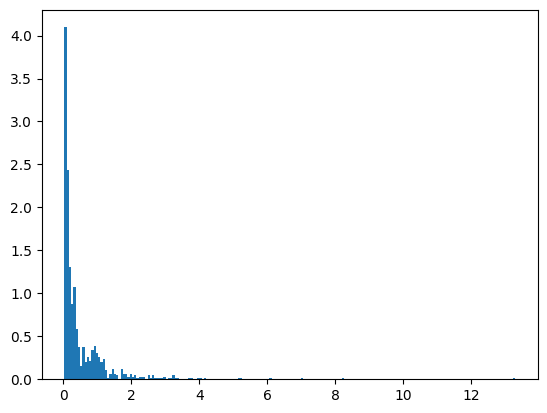

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(a, bins = 200, density=True)

In [12]:
print(np.mean(a), np.median(a), min(a), max(a))

0.5073919444444445 0.20833333333333334 0.025277777777777777 13.306111111111111
